### 2021_10_28_1

### 다양한 모델 비교
* 다양한 모델 비교
* 비선형 변환

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns      # seaborn은 matplotlib보다 간단하게 사용 가능
import os
for dirname, _, filenames in os.walk('../CSV/bike-sharing-demand/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../CSV/bike-sharing-demand/.DS_Store
../CSV/bike-sharing-demand/sampleSubmission.csv
../CSV/bike-sharing-demand/06_sub.csv
../CSV/bike-sharing-demand/test.csv
../CSV/bike-sharing-demand/04_sub.csv
../CSV/bike-sharing-demand/05_sub.csv
../CSV/bike-sharing-demand/01_sub.csv
../CSV/bike-sharing-demand/03_sub.csv
../CSV/bike-sharing-demand/train.csv
../CSV/bike-sharing-demand/02_sub.csv


In [2]:
train = pd.read_csv("../CSV/bike-sharing-demand/train.csv",parse_dates=['datetime'])
test = pd.read_csv("../CSV/bike-sharing-demand/test.csv",parse_dates=['datetime'])
sub = pd.read_csv("../CSV/bike-sharing-demand/sampleSubmission.csv")

print("train shape : {}".format(train.shape))
print("test shape : {}".format(test.shape))
print("sub shape : {}".format(sub.shape))

train shape : (10886, 12)
test shape : (6493, 9)
sub shape : (6493, 2)


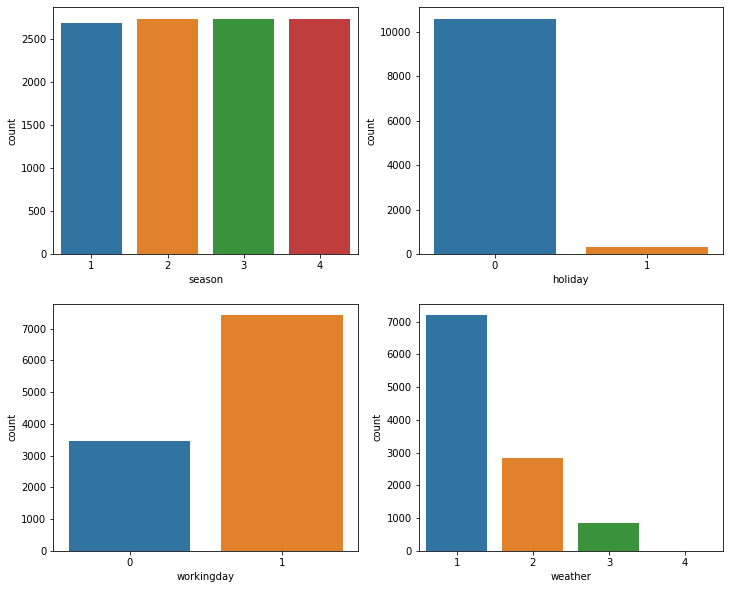

In [3]:
col_names = [ 'season', 'holiday', 'workingday', 'weather'  ]
i = 0
plt.figure(figsize=(12,10))   # 전체 그래프의 크기 지정 

for name in col_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회 
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(2,2,i)        # 2행 2열에 i번째 그래프 선택
    sns.countplot(x=name, data=train)  # i번째 그래프에 sns.countplot를 그리겠다.
    
plt.show()  # 주피터에서 보여주지만, 다른곳(editor, pycharm)에서는 이걸 실행시켜야 한다. 

In [4]:
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns           ## seaborn은 matplotlib보다 간단하게 사용 가능

### 수치형 데이터 선택

In [5]:
### temp, atemp, humidity, windspeed

num_names = ['temp', 'atemp', 'humidity', 'windspeed']
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

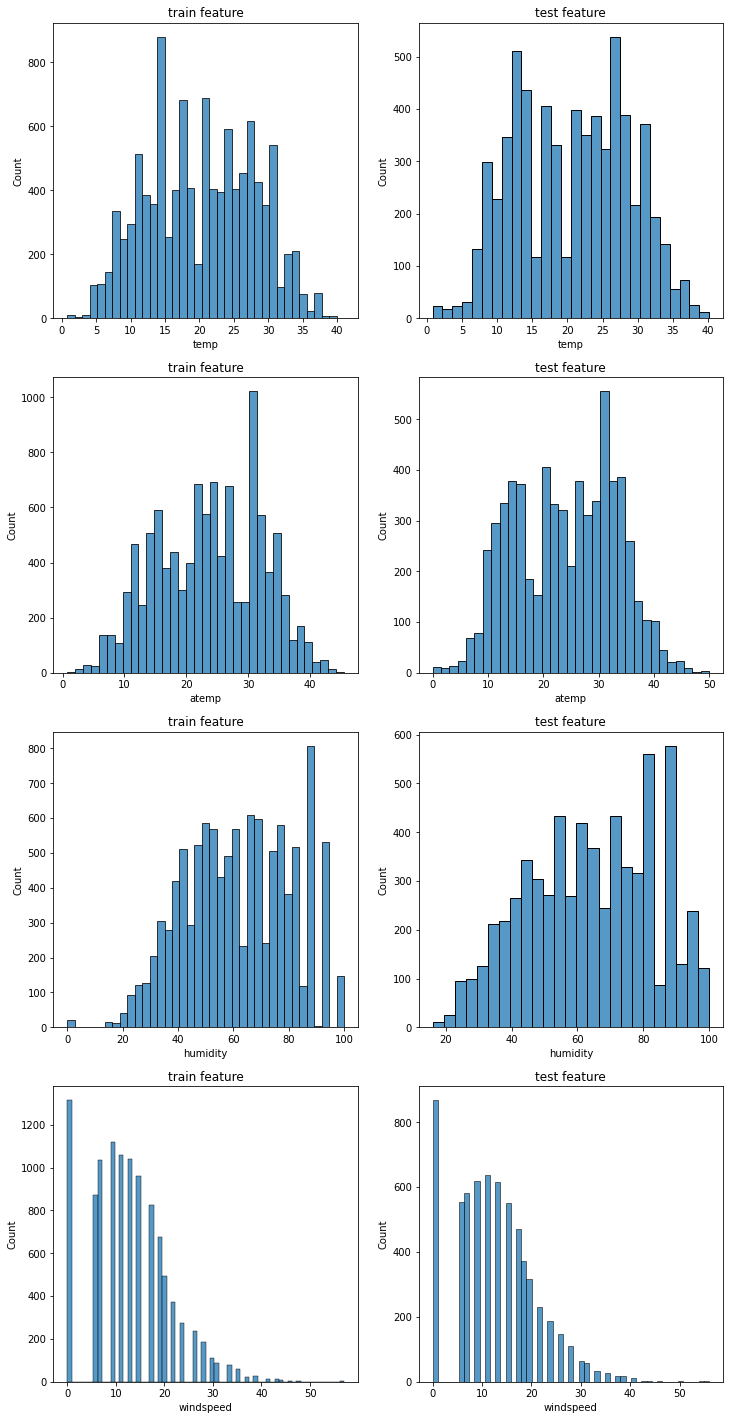

In [6]:
i = 0
plt.figure(figsize=(12,25))   # 전체 그래프의 크기 지정 (가로, 세로)

for name in num_names:        # 컬럼명을 전달 리스트 수 만큼 반복 -> 4회
    i = i + 1                 # 숫자를 1씩 증가.
    plt.subplot(4,2,i*2-1)        # 2행 2열에 i번째 그래프 선택
    sns.histplot(x=name, data=train)  # i번째 그래프에 sns.histplot를 그리겠다.
    plt.title("train feature")
    
    plt.subplot(4,2,i*2)        # 2행 2열에 i번째 그래프 선택
    sns.histplot(x=name, data=test)  # i번째 그래프에 sns.histplot를 그리겠다.
    plt.title("test feature")
    
plt.show()

In [7]:
new_tr = train.copy()   # 데이터 백업
new_test = test.copy()
new_tr.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

### 특징 추출 - 날짜 피처로부터 추출

In [8]:
## 더미변수, 파생변수 생성
new_tr['year'] = new_tr['datetime'].dt.year
new_tr['month'] = new_tr['datetime'].dt.month
new_tr['day'] = new_tr['datetime'].dt.day
new_tr['hour'] = new_tr['datetime'].dt.hour
new_tr['minute'] = new_tr['datetime'].dt.minute
new_tr['second'] = new_tr['datetime'].dt.second
new_tr['dayofweek'] = new_tr['datetime'].dt.dayofweek

new_test['year'] = new_test['datetime'].dt.year
new_test['month'] = new_test['datetime'].dt.month
new_test['day'] = new_test['datetime'].dt.day
new_test['hour'] = new_test['datetime'].dt.hour
new_test['minute'] = new_test['datetime'].dt.minute
new_test['second'] = new_test['datetime'].dt.second
new_test['dayofweek'] = new_test['datetime'].dt.dayofweek

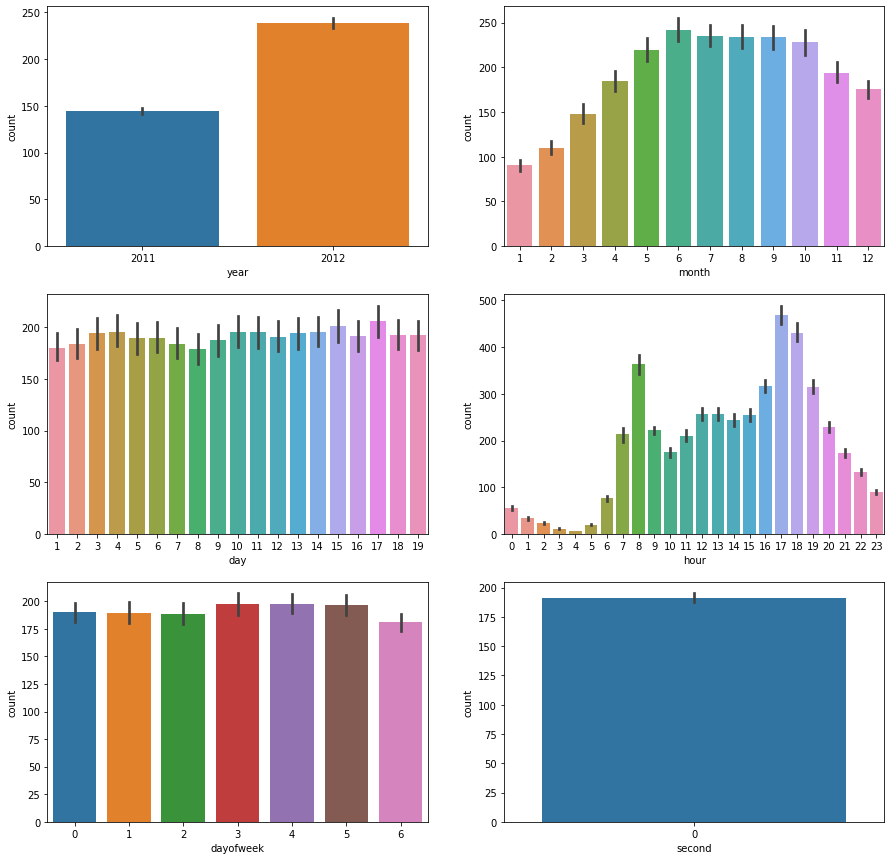

In [9]:
datetime_names = ['year', 'month', 'day', 'hour', 'dayofweek', 'second']

i=0
plt.figure(figsize=(15,15))
for name in datetime_names:
    i = i + 1
    plt.subplot(3,2,i)
    sns.barplot(x=name, y='count', data=new_tr)
    
plt.show()

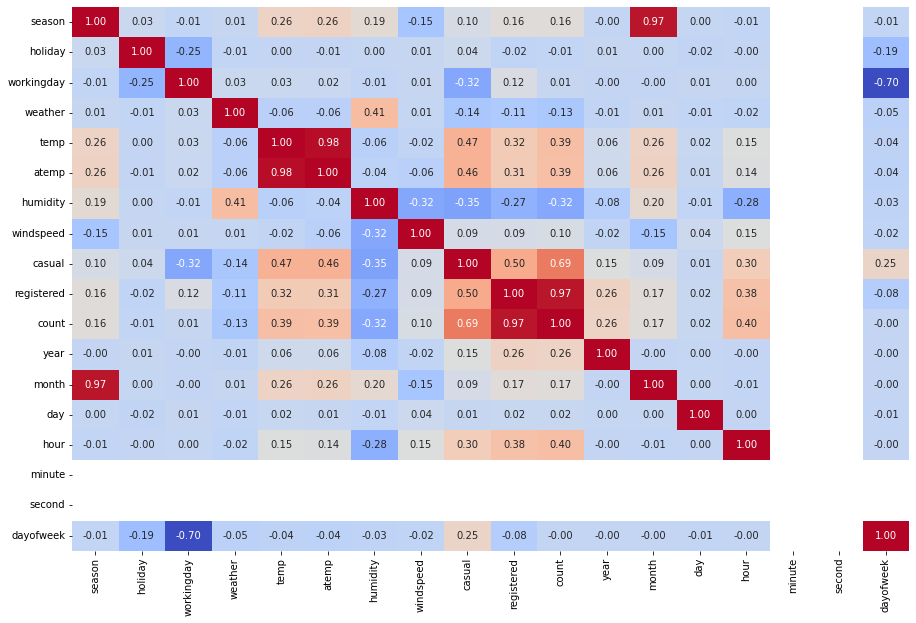

In [10]:
plt.figure(figsize=(15,10))
g = sns.heatmap(new_tr.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=False)

### 비선형 변환

In [38]:
new_tr["log_count"] = np.log1p(new_tr["count"])

<AxesSubplot:xlabel='log_count', ylabel='Count'>

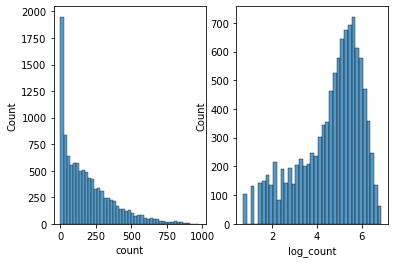

In [39]:
plt.subplot(1, 2, 1)
sns.histplot(x = "count", data = new_tr)

plt.subplot(1, 2, 2)
sns.histplot(x = "log_count", data = new_tr)

In [40]:
feature_names = [ 'season', 'holiday', 'workingday', 'weather', 
                  'temp', 'atemp', 'humidity', 'windspeed', 
                  "year", "hour", "dayofweek"]  # 공통 변수

X_tr_all = new_tr[feature_names]  # 학습용 데이터 변수 선택
y_tr_all = new_tr["log_count"]        # 렌탈 대수 변수 값 선택

X_test_all = new_test[feature_names]    # 테스트 데이터의 변수 선택 

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_tr_all, 
                                                    y_tr_all,
                                                    test_size=0.3,
                                                    random_state=77)

In [43]:
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor   # 앙상블(의사결정트리 확장판)
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

# 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

# MSE(Mean Squared Error) 
mse_val = ((pred - y_test) ** 2).sum() / len(pred)
print("mse value : {:.3f}".format(mse_val))

학습용 데이터 결정계수: 0.490
테스트 데이터 결정계수: 0.474
mse value : 1.047


### 다양한 모델 비교
* LinearRegression
* DecisionTreeRegressor
* RandomForestRegressor
* GradientBoostingRegressor

In [45]:
models = [LinearRegression(), 
         DecisionTreeRegressor(), 
         RandomForestRegressor(n_jobs = -1, random_state = 37), 
         GradientBoostingRegressor(random_state = 37)]

for model in models :
    print(model)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    # 결정계수 확인
    print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
    print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

    # MSE(Mean Squared Error) 
    mse_val = ((pred - y_test) ** 2).sum() / len(pred)
    print("mse value : {:.3f}".format(mse_val))
    print()

LinearRegression()
학습용 데이터 결정계수: 0.490
테스트 데이터 결정계수: 0.474
mse value : 1.047

DecisionTreeRegressor()
학습용 데이터 결정계수: 1.000
테스트 데이터 결정계수: 0.901
mse value : 0.197

RandomForestRegressor(n_jobs=-1, random_state=37)
학습용 데이터 결정계수: 0.993
테스트 데이터 결정계수: 0.953
mse value : 0.093

GradientBoostingRegressor(random_state=37)
학습용 데이터 결정계수: 0.921
테스트 데이터 결정계수: 0.919
mse value : 0.162



### 최종 모델 선택

In [46]:
model = RandomForestRegressor(n_jobs=-1, random_state=37)  # 모델 객체 생성.
model.fit(X_train, y_train)           # 모델 학습(공부가 되었다.)

# 결정계수 확인
print("학습용 데이터 결정계수: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 데이터 결정계수: {:.3f}".format(model.score(X_test, y_test)))

# MSE(Mean Squared Error) 
mse_val = ((pred - y_test) ** 2).sum() / len(pred)
print("mse value : {:.3f}".format(mse_val))

학습용 데이터 결정계수: 0.993
테스트 데이터 결정계수: 0.953
mse value : 0.162


In [47]:
pred = model.predict(X_test_all)   # 예측
sub['count'] = np.expm1(pred)
sub.loc[sub['count'] < 0, 'count'] = 0
sub.head(3)

,datetime,count
0,2011-01-20 00:00:00,11.027636
1,2011-01-20 01:00:00,3.683579
2,2011-01-20 02:00:00,4.115133


In [48]:
# 처음 만는 제출용 csv 파일, 행번호를 없애기
sub.to_csv("../CSV/bike-sharing-demand/08_sub.csv", index = False)

In [37]:
print(np.log(100 + 1), np.log1p(100))
print(np.expm1(np.log(100 + 1)), np.exp(np.log1p(100)))

4.61512051684126 4.61512051684126
100.00000000000003 101.00000000000003
100.00000000000003 101.00000000000003


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [51]:
def model_val(model_name) :
    model = model_name
    model.fit(X_train, y_train)
    score = cross_val_score(model, X_test, y_test, cv = 5, 
                           scoring = "neg_mean_squared_error")
    print("MSE :", score)
    avg_score = np.abs(score.mean()) # 절대값
    print("MSE 평균(cv = 5) :", avg_score)
    return avg_score